In [15]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [16]:
with MPRester("kMkuaNd0F7org0EE2QryQaonTKfVvGw4") as m:
    structure = m.get_phonon_bandstructure_by_material_id("mp-10226")

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

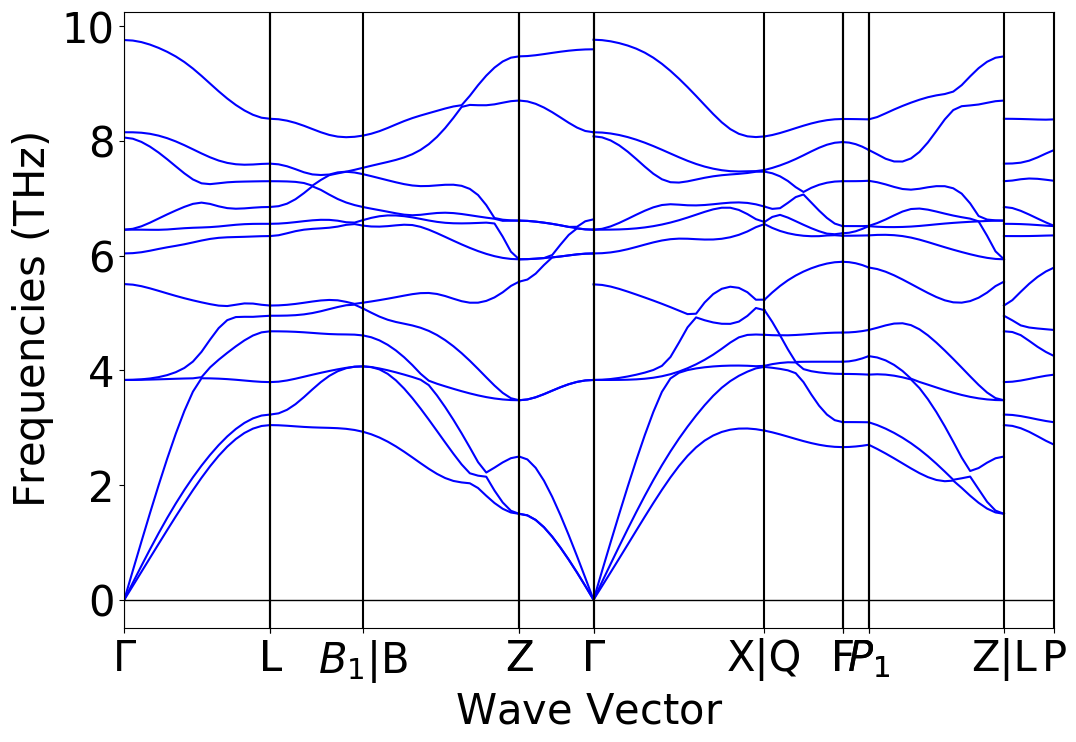

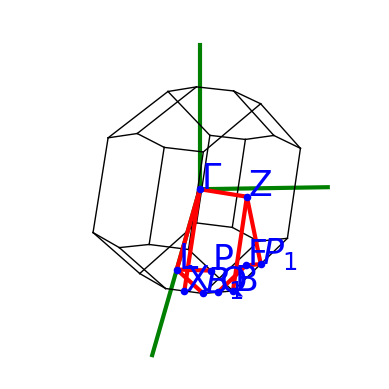

In [17]:
PhononBSPlotter(structure).get_plot()
PhononBSPlotter(structure).plot_brillouin()

In [18]:
data = PhononBSPlotter(structure).bs_plot_data()
distances = data.get("distances")
frequency = data.get("frequency")

In [19]:
vitesse_son_1 = 2*np.pi*np.abs((frequency[0][1][1]-frequency[0][1][0])*(10**12))/((distances[0][1]-distances[0][0])*(10**10))
print("La vitesse du son de la courbe 1 dans la direction Gamma - L vaut {} m/s.".format(vitesse_son_1))

vitesse_son_2 = 2*np.pi*np.abs((frequency[3][0][-1] - frequency[3][0][-2])*(10**12))/((distances[3][-1]-distances[3][-2])*(10**10))
print("La vitesse du son de la courbe 2 dans la direction Z - Gamma vaut {} m/s.".format(vitesse_son_2))

vitesse_son_3 = 2*np.pi*np.abs((frequency[4][2][1]-frequency[4][2][0])*(10**12))/((distances[4][1]-distances[4][0])*(10**10))
print("La vitesse du son de la courbe 3 dans la direction Gamma - X vaut {} m/s.".format(vitesse_son_3))

La vitesse du son de la courbe 1 dans la direction Gamma - L vaut 3395.3215226249276 m/s.
La vitesse du son de la courbe 2 dans la direction Z - Gamma vaut 2856.463862610756 m/s.
La vitesse du son de la courbe 3 dans la direction Gamma - X vaut 5765.702202450914 m/s.


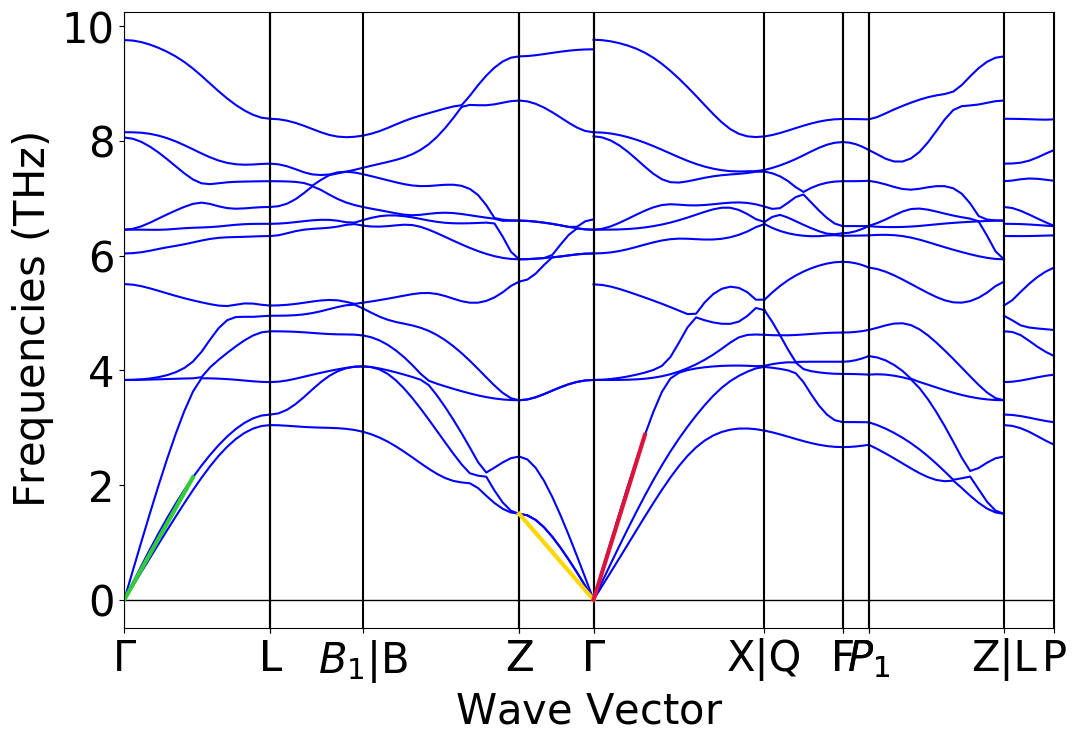

In [23]:
PhononBSPlotter(structure).get_plot()

# Première pente en vert
plt.plot([distances[0][0],distances[0][0]+distances[0][8]-distances[0][0]],[frequency[0][1][0],frequency[0][1][0]+frequency[0][1][8]-frequency[0][1][0]], color='limegreen', lw=3)
# Deuxième pente en jaune
plt.plot([distances[3][0],distances[3][0]+distances[3][-1]-distances[3][0]],[frequency[3][0][0],frequency[3][0][0]+frequency[3][0][-1]-frequency[3][0][0]], color='gold', lw=3)
# Troisième pente en rouge
plt.plot([distances[4][0], distances[4][0]+distances[4][6]-distances[4][0]],[frequency[4][2][0],frequency[4][2][0]+frequency[4][2][6]-frequency[4][2][0]], color='crimson', lw=3)